In [1]:
import matplotlib
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
from matplotlib import colors
#Comandos opcionais para formatar gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}	
lines = {'linewidth' : 3.0}
figure = {'figsize' : [6.0, 6/1.6]}
matplotlib.rc('font', **font)
matplotlib.rc('lines', **lines)
matplotlib.rc('figure', **figure)

import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
import os #com
import glob2 as glob
from scipy.optimize import curve_fit # pacote para ajuste de curvas
# navegar pelas pastas

In [2]:
file_list = sorted(glob.glob(os.path.join('*')))
print(file_list)

['F088_exp3a.ipynb', 'Ic_Ib.png', 'Ic_Vce.png', 'dados_transistor_3a', 'dados_transistor_3a.zip']


In [3]:
file = 'dados_transistor_3a/dados_Vce_Vcc_15p5.csv'
df = pd.read_csv(file,sep=',') # DataFrame segundo Pandasdf
df.columns = ['Rc(Ohm)','Vce_rb_10k(V)','Vce_rb_12k(V)', 'Vce_rb_15k(V)', 'Vce_rb_20k(V)']
df.head() # preview the first few rows

,Rc(Ohm),Vce_rb_10k(V),Vce_rb_12k(V),Vce_rb_15k(V),Vce_rb_20k(V)
0,100,13.86,14.10,14.29,14.43
1,200,12.82,13.22,13.61,13.89
2,300,11.75,12.40,12.87,13.32
3,400,10.71,11.57,12.20,12.81
4,500,9.70,10.70,11.54,12.28


In [4]:
Ic = df['Vce_rb_10k(V)']/df['Rc(Ohm)']
print(Ic.head())

0    0.138600
1    0.064100
2    0.039167
3    0.026775
4    0.019400
dtype: float64


In [5]:
#Calculando propriedades
Ic = df['Vce_rb_10k(V)']/df['Rc(Ohm)']

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


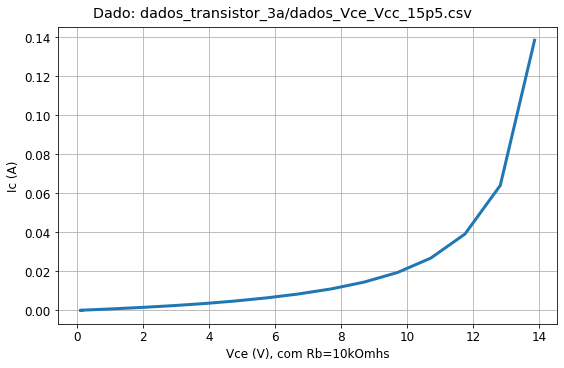

In [6]:
#----
plt.ion()
fig,ax = plt.subplots(figsize=(8,5))
#------------------------
ax0=ax
#--
ax0.plot(df['Vce_rb_10k(V)'],Ic)

#--
ax0.grid(True)
ax0.set_xlabel('Vce (V), com Rb=10kOmhs')
ax0.set_ylabel('Ic (A)')
#------------------------

#------------------
plt.tight_layout()
#----
st = fig.suptitle('Dado: '+file)
# shift subplots down:
st.set_y(1.02)
#---
#plt.savefig(file+'_fig.png', bbox_inches="tight")

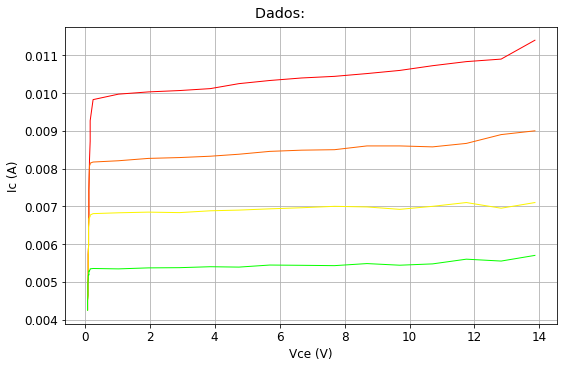

In [34]:
res_val = np.array([0,10,12,15,20])
#----------------
#mapa de cores
cm=plt.get_cmap('hsv')
norm = colors.Normalize(vmin = 10,vmax = 20)
#----------------
#initialize python lists to store the relevant quantities
label_vec = [] # label
#---
fig,ax = plt.subplots(figsize=(8,5))
for ii,column in enumerate(df.columns): #calcula e plota para cada coluna
    #----
    ax0=ax
    if ii>=1: #ignora Rc
        Ic = (15-df[column])/df['Rc(Ohm)']
        ax0.plot(df['Vce_rb_10k(V)'],Ic, lw=1, ls='-',
                color=cm((norm(res_val[ii]))*1/3))
        
    '''
    if ii==0: # different label in this case
        label_vec.append('sem cap.')
        ax0.plot(1e3*df['tempo(s)'],df['ch2(V)'], lw=1,ls='--',
                 color='k',
                 label=label_vec[ii])
    elif ii==len(res_val)-1: # different label in this case
        label_vec.append('aberto (sem res.)')
        ax0.plot(1e3*df['tempo(s)'],df['ch2(V)'], lw=1,ls='--',
                 color=cm((norm(res_val[ii])**(0.1))),
                 label=label_vec[ii])
    else: # common labels
        label_vec.append('{:}'.format(res_val[ii])+' $\Omega$')
        ax0.plot(1e3*df['tempo(s)'],df['ch2(V)'], lw=1,
                 color=cm((norm(res_val[ii])**(0.1))),
                 label=label_vec[ii])
    '''
    #--
    #ax0.set_xlim([0,40])
    ax0.grid(True)
    ax0.set_xlabel('Vce (V)')
    ax0.set_ylabel('Ic (A)')
    #ax0.legend(loc='center left',bbox_to_anchor=(1,0.5))
    #------------------
plt.tight_layout()
#----
st = fig.suptitle('Dados: ')
# shift subplots down:
st.set_y(1.02)
#---
#plt.savefig('todos_dados_meia_onda'+'_fig.png', bbox_inches="tight")
#plt.savefig('todos_dados_onda_completa'+'_fig.png', bbox_inches="tight")

# Gain ($\beta$)

In [7]:
file = 'dados_transistor_3a/dados_Ic_vs_Ib_Vbb_Vcc_15p5V.csv'
df = pd.read_csv(file,sep=',') # DataFrame segundo Pandasdf
df.head() # preview the first few rows

,tempo(s),Vbb(V),Vbe(V),Vce(V)
0,0.0004,8.08,0.72,0.24
1,0.0008,8.00,0.72,0.24
2,0.0012,8.00,0.72,0.24
3,0.0016,8.00,0.72,0.24
4,0.0020,8.00,0.72,0.24


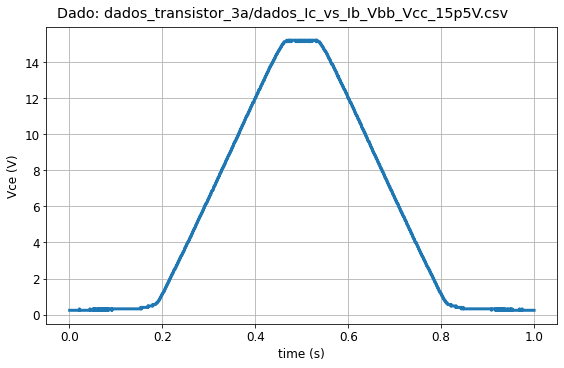

In [8]:
#----
plt.ion()
fig,ax = plt.subplots(figsize=(8,5))
#------------------------
ax0=ax
#--
ax0.plot(df['tempo(s)'], df['Vce(V)'])

#--
ax0.grid(True)
ax0.set_xlabel('time (s)')
ax0.set_ylabel('Vce (V)')
#------------------------

#------------------
plt.tight_layout()
#----
st = fig.suptitle('Dado: '+file)
# shift subplots down:
st.set_y(1.02)
#---
#plt.savefig(file+'_fig.png', bbox_inches="tight")

In [9]:
Rc = 220
Ic = (15-df['Vce(V)'])/Rc
print(Ic.head())
Rb = 10e3
Ib = (df['Vbb(V)']-df['Vbe(V)'])/Rb
print(Ib.head())

0    0.067091
1    0.067091
2    0.067091
3    0.067091
4    0.067091
Name: Vce(V), dtype: float64
0    0.000736
1    0.000728
2    0.000728
3    0.000728
4    0.000728
dtype: float64


         Ib        Ic
0  0.000736  0.067091
1  0.000728  0.067091
2  0.000728  0.067091
3  0.000728  0.067091
4  0.000728  0.067091
           Ib        Ic
480  0.000416  0.064545
481  0.000416  0.064545
482  0.000416  0.064545
483  0.000416  0.064545
484  0.000416  0.064182


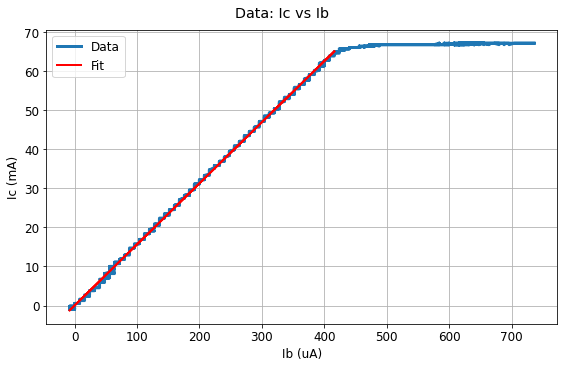

In [21]:
#----
plt.ion()
fig,ax = plt.subplots(figsize=(8,5))
#------------------------
ax0=ax
#--
ax0.plot(Ib*1e6, Ic*1e3, label = 'Data')

data = [Ib, Ic]
headers = ["Ib", "Ic"]
newdf= pd.concat(data, axis=1, keys=headers)
print(newdf.head())
df_fit = newdf.loc[(newdf.Ib < 0.00042)]
print(df_fit.head())

ax0.plot(df_fit['Ib']*1e6, 156.296518*df_fit['Ib']*1e3 , lw=2, ls= '-', color= 'red', label = 'Fit')
#--
ax0.grid(True)
ax0.set_xlabel('Ib (uA)')
ax0.set_ylabel('Ic (mA)')
#------------------------
ax0.legend()
#------------------
plt.tight_layout()
#----
st = fig.suptitle('Data: Ic vs Ib')
# shift subplots down:
st.set_y(1.02)
#---
plt.savefig('Ic_Ib_with_fit_final_fig.png', bbox_inches="tight")

In [22]:
data = [Ib, Ic]
headers = ["Ib", "Ic"]
newdf= pd.concat(data, axis=1, keys=headers)
print(newdf.head())
df_fit = newdf.loc[(newdf.Ib < 0.0004)]
print(df_fit.head())

         Ib        Ic
0  0.000736  0.067091
1  0.000728  0.067091
2  0.000728  0.067091
3  0.000728  0.067091
4  0.000728  0.067091
           Ib        Ic
510  0.000392  0.062000
515  0.000392  0.061636
520  0.000392  0.061273
521  0.000392  0.060909
522  0.000392  0.060909


# Fitting and model

In [23]:
from lmfit import Model, Parameters

def collector_current(i_b, beta):
    return beta*i_b

mod = Model(collector_current)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

parameter names: ['beta']
independent variables: ['i_b']


In [27]:
# onda completa
params = mod.make_params(beta=100)
result = mod.fit(df_fit['Ic'], params, i_b=df_fit['Ib'])

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
print(dic_result)
beta = dic_result['beta']

[[Model]]
    Model(collector_current)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 1462
    # variables        = 1
    chi-square         = 4.5196e-04
    reduced chi-square = 3.0935e-07
    Akaike info crit   = -21912.6200
    Bayesian info crit = -21907.3324
[[Variables]]
    beta:  156.296518 +/- 0.06944187 (0.04%) (init = 100)
OrderedDict([('beta', 156.296517804982)])


In [20]:
# onda completa
params = mod.make_params(beta=100)
result = mod.fit(Ic, params, i_b=Ib)

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
print(dic_result)
beta = dic_result['beta']

[[Model]]
    Model(collector_current)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 2500
    # variables        = 1
    chi-square         = 0.21007652
    reduced chi-square = 8.4064e-05
    Akaike info crit   = -23458.8237
    Bayesian info crit = -23452.9996
[[Variables]]
    beta:  121.562199 +/- 0.45736201 (0.38%) (init = 100)
OrderedDict([('beta', 121.56219894736537)])


2.749008693746935e-05
0.008333333333333333


<ipython-input-37-2a52573297b3>:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


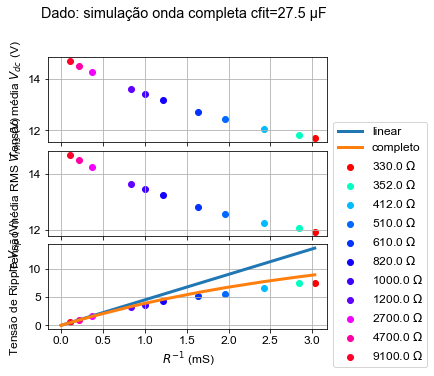

In [ ]:
print(c0)
print(T)
#------------------------------------
#Generate the "theory" curves from our fitted model
vripT1_vec= (vmax_vec[0])/(c0*res_val)*T #linearizado
vripT2_vec= vmax_vec[0]*(1 - np.exp(-T/(res_val*c0)) ) #completo
#------------------------------------
fig,ax = plt.subplots(3,1,figsize=(5,5), sharex=True)
ax0=ax[0]
ax0.grid(True)
ax0.set_ylabel('Tensão média $V_{dc}$ (V)')
#------------------------------------
for ii,r0 in enumerate(res_val):
    # this if is to skip the case with no capacitor (ii=0) and no resistor (ii=12)
    if (ii>=1 and ii<len(res_val)-1): 
        ax[0].scatter(Rinverse[ii],vmed_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
        ax[1].scatter(Rinverse[ii],vrms_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
        ax[2].scatter(Rinverse[ii],vrip_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
#---------------
ax0=ax[1]
ax0.grid(True)
ax0.set_ylabel('Tensão média RMS $V_{rms}$ (V)')
#------------------------------------
        
#----------
ax0=ax[2]
ax0.grid(True)
#-------------------
ax0.plot(Rinverse,vripT1_vec,'-',label ='linear')
ax0.plot(Rinverse,vripT2_vec,'-',label = 'completo')

ax0.set_ylabel('Tensão de Ripple $V_{rip}$ (V)')
ax0.set_xlabel('$R^{-1}$ (mS)')
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(loc='center left',bbox_to_anchor=(1,1))
#----
st = fig.suptitle('Dado: simulação onda completa cfit={:2.1f} μF'.format(1e6*c0))
# shift subplots down:
st.set_y(1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
#plt.savefig('analise_onda_completa_teoria'+'_fig.png', bbox_inches='tight')

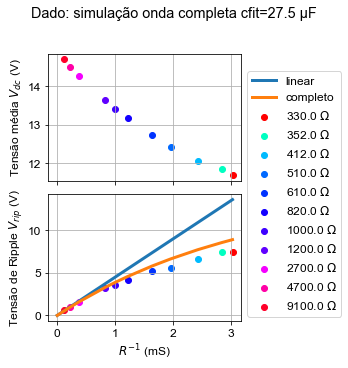

In [ ]:
#------------------------------------
#Generate the "theory" curves from our fitted model
vripT1_vec= (vmax_vec[0])/(c0*res_val)*T #linearizado
vripT2_vec= vmax_vec[0]*(1 - np.exp(-T/(res_val*c0)) ) #completo
#------------------------------------
fig,ax = plt.subplots(2,1,figsize=(5,5), sharex=True)
ax0=ax[0]
ax0.grid(True)
ax0.set_ylabel('Tensão média $V_{dc}$ (V)')
#------------------------------------
for ii,r0 in enumerate(res_val):
    # this if is to skip the case with no capacitor (ii=0) and no resistor (ii=12)
    if (ii>=1 and ii<len(res_val)-1): 
        ax[0].scatter(Rinverse[ii],vmed_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
        ax[1].scatter(Rinverse[ii],vrip_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
#---------------
ax0=ax[1]
ax0.grid(True)
#-------------------
ax0.plot(Rinverse,vripT1_vec,'-',label ='linear')
ax0.plot(Rinverse,vripT2_vec,'-',label = 'completo')

ax0.set_ylabel('Tensão de Ripple $V_{rip}$ (V)')
ax0.set_xlabel('$R^{-1}$ (mS)')
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(loc='center left',bbox_to_anchor=(1,1))
#----
st = fig.suptitle('Dado: simulação onda completa cfit={:2.1f} μF'.format(1e6*c0))
# shift subplots down:
st.set_y(1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig('analise_onda_completa_teoria'+'_fig.png', bbox_inches='tight')